# Exploratory Data Analysis on Retail Sales Dataset

In this project, we perform EDA on a retail sales dataset to discover patterns, trends, and actionable insights for better business decision-making.

## Key Analyses:
- Data Loading & Cleaning
- Descriptive Statistics
- Time Series Analysis
- Customer & Product Behavior
- Visualizations
- Recommendations


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Setup
sns.set(style="whitegrid")
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Load data
df = pd.read_csv('retail_sales_dataset.csv')
df['Date'] = pd.to_datetime(df['Date'])
df.head()

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100


In [3]:
# Dataset overview
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Transaction ID    1000 non-null   int64         
 1   Date              1000 non-null   datetime64[ns]
 2   Customer ID       1000 non-null   object        
 3   Gender            1000 non-null   object        
 4   Age               1000 non-null   int64         
 5   Product Category  1000 non-null   object        
 6   Quantity          1000 non-null   int64         
 7   Price per Unit    1000 non-null   int64         
 8   Total Amount      1000 non-null   int64         
dtypes: datetime64[ns](1), int64(5), object(3)
memory usage: 70.4+ KB


,Transaction ID,Date,Age,Quantity,Price per Unit,Total Amount
count,1000.000000,1000,1000.00000,1000.000000,1000.000000,1000.000000
mean,500.500000,2023-07-03 00:25:55.200000256,41.39200,2.514000,179.890000,456.000000
min,1.000000,2023-01-01 00:00:00,18.00000,1.000000,25.000000,25.000000
25%,250.750000,2023-04-08 00:00:00,29.00000,1.000000,30.000000,60.000000
50%,500.500000,2023-06-29 12:00:00,42.00000,3.000000,50.000000,135.000000
75%,750.250000,2023-10-04 00:00:00,53.00000,4.000000,300.000000,900.000000
max,1000.000000,2024-01-01 00:00:00,64.00000,4.000000,500.000000,2000.000000
std,288.819436,NaN,13.68143,1.132734,189.681356,559.997632


In [4]:
# Descriptive Statistics
df[['Age', 'Quantity', 'Price per Unit', 'Total Amount']].describe()

,Age,Quantity,Price per Unit,Total Amount
count,1000.00000,1000.000000,1000.000000,1000.000000
mean,41.39200,2.514000,179.890000,456.000000
std,13.68143,1.132734,189.681356,559.997632
min,18.00000,1.000000,25.000000,25.000000
25%,29.00000,1.000000,30.000000,60.000000
50%,42.00000,3.000000,50.000000,135.000000
75%,53.00000,4.000000,300.000000,900.000000
max,64.00000,4.000000,500.000000,2000.000000


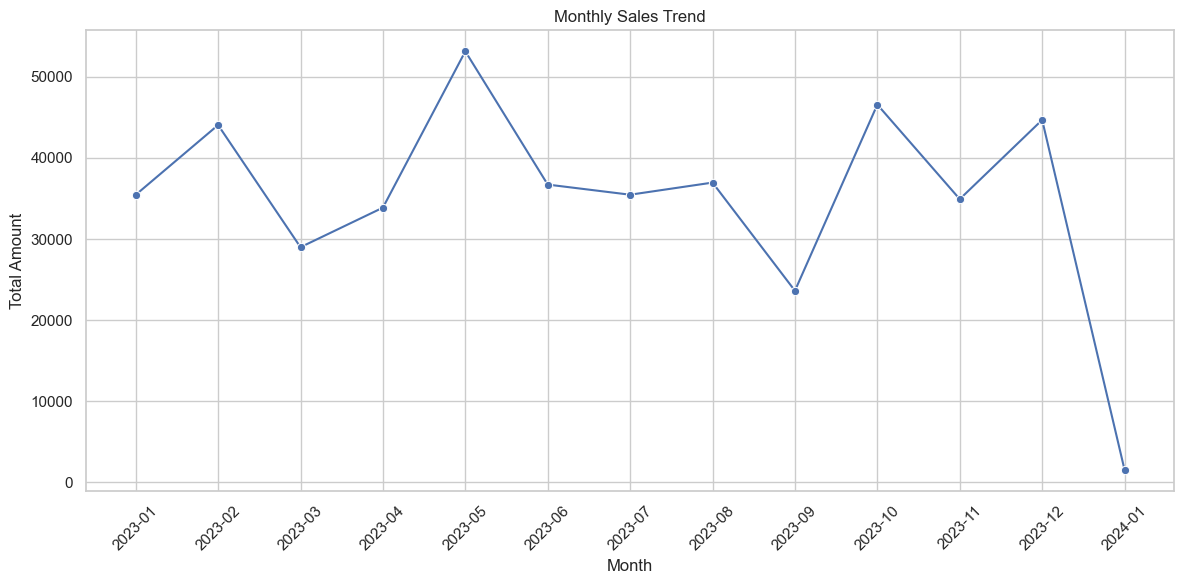

In [5]:
# Monthly Sales Trend
df['Month'] = df['Date'].dt.to_period('M')
monthly_sales = df.groupby('Month')['Total Amount'].sum().reset_index()
monthly_sales['Month'] = monthly_sales['Month'].astype(str)

plt.figure(figsize=(12, 6))
sns.lineplot(x='Month', y='Total Amount', data=monthly_sales, marker='o')
plt.xticks(rotation=45)
plt.title('Monthly Sales Trend')
plt.tight_layout()
plt.show()

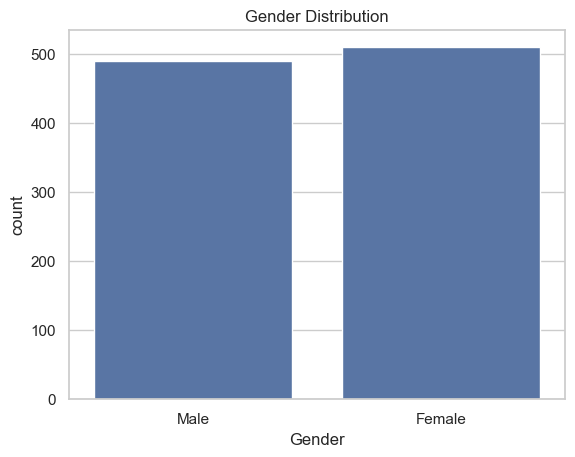

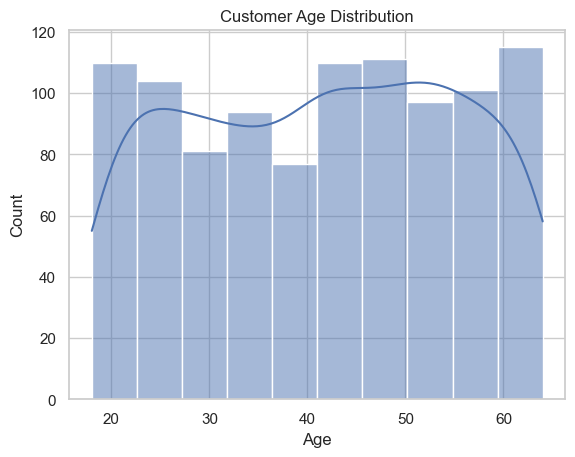

In [6]:
# Gender Distribution
sns.countplot(x='Gender', data=df)
plt.title('Gender Distribution')
plt.show()

# Age Distribution
sns.histplot(df['Age'], bins=10, kde=True)
plt.title('Customer Age Distribution')
plt.show()

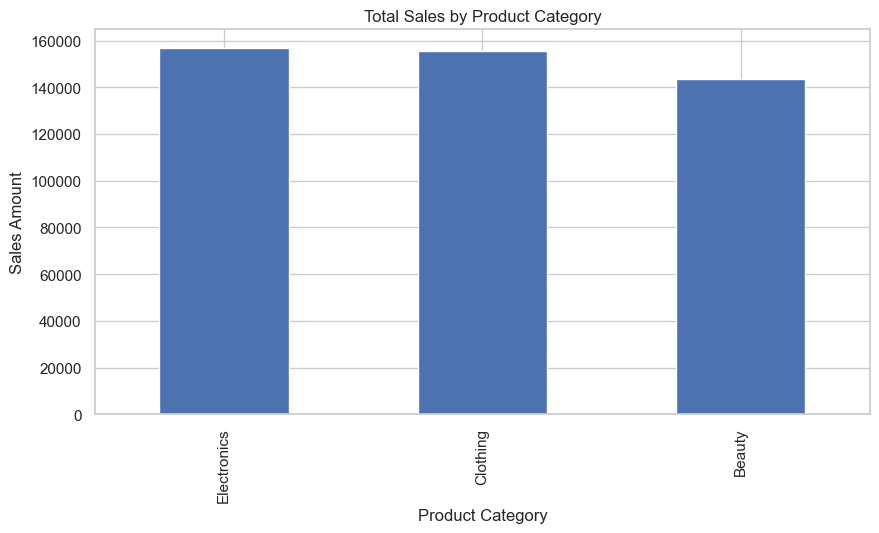

In [7]:
# Top Selling Product Categories
category_sales = df.groupby('Product Category')['Total Amount'].sum().sort_values(ascending=False)
category_sales.plot(kind='bar', figsize=(10, 5), title='Total Sales by Product Category')
plt.ylabel('Sales Amount')
plt.show()

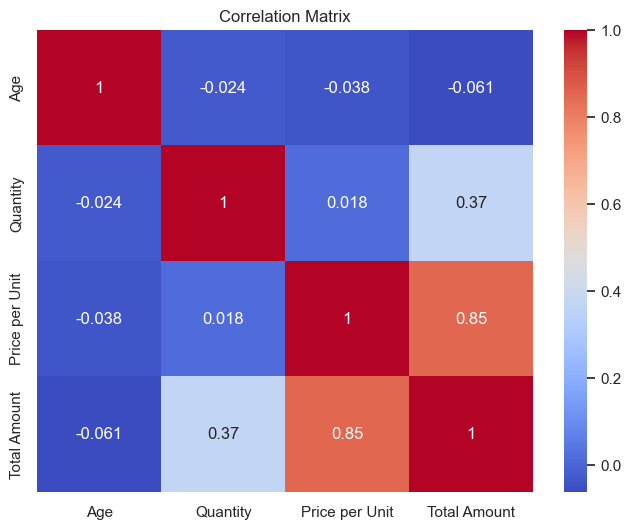

In [8]:
# Correlation Heatmap
plt.figure(figsize=(8,6))
sns.heatmap(df[['Age', 'Quantity', 'Price per Unit', 'Total Amount']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

## Key Insights

- **Sales Trend**: There's noticeable variation in monthly sales; promotional planning can target low-performing months.
- **Top Products**: Focus on high-performing product categories for revenue growth.
- **Customer Demographics**: Majority age groups can be targeted for marketing strategies.
- **Gender Influence**: Balanced gender-based campaigns may be effective.

## Recommendations

1. Implement promotional offers in months with historically low sales.
2. Boost inventory for high-demand categories.
3. Personalize marketing based on age demographics.
4. Consider customer loyalty programs to retain existing customers.
